In [94]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


In [95]:
# #import dataset
# Use the absolute path to the CSV file
file_path = '/Users/saheedadeitan/Downloads/BusyQA_bootcamp//segmentation data.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame to verify the import
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [97]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [98]:
# no of rows
print('Number of rows: ' + str(df.shape[0]))


Number of rows: 2000


In [99]:
print('Number of columns: ' + str(len(df.columns)))
print('Columns in df: ' + str(df.columns))

Number of columns: 8
Columns in df: Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [101]:
#Getting the data types of the dataset
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [102]:
#Finding out if there are Null values
null_counts = df.isna().sum()
null_counts

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [103]:
df.shape

(2000, 8)

In [104]:
df['Settlement size'].unique()

array([2, 0, 1])

In [105]:
df['Age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59, 73, 72, 76, 71, 18])

In [106]:
df['Income'].unique()

array([124670, 150773,  89210, ...,  86400,  97968,  68416])

In [107]:
df['Marital status'].unique()

array([0, 1])

In [108]:
# check for deuplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [109]:
df['ID'].unique()

array([100000001, 100000002, 100000003, ..., 100001998, 100001999,
       100002000])

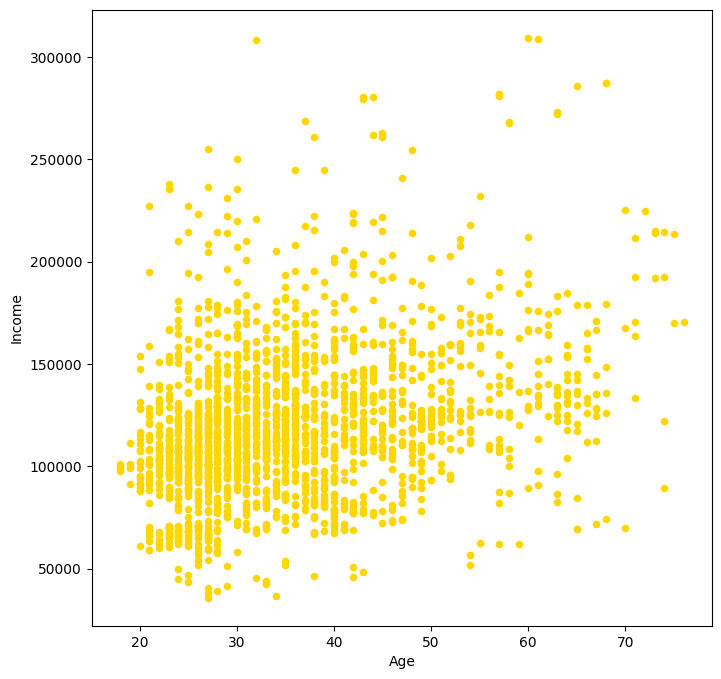

In [110]:
# to detect outlier, we use scatter plot 
#  i am looking for any data points that seem out of place or unusual compared to the rest of the data
#  as they may indicate errors, anomalies, or interesting phenomena within the dataset.
# Scatter plot using pandas
ax1 = df.plot.scatter(x='Age',
                      y='Income',
                      c='gold', figsize = (8,8))
plt.xlabel('Age') 
plt.ylabel('Income')
plt.show()

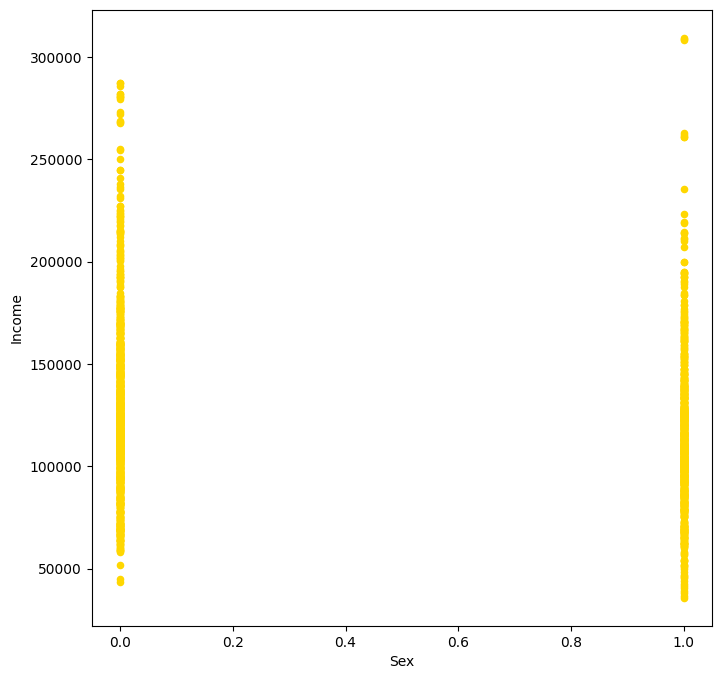

In [111]:
# sex vs income
ax1 = df.plot.scatter(x='Sex',
                      y='Income',
                      c='gold', figsize = (8,8))
plt.xlabel('Sex') 
plt.ylabel('Income')
plt.show()

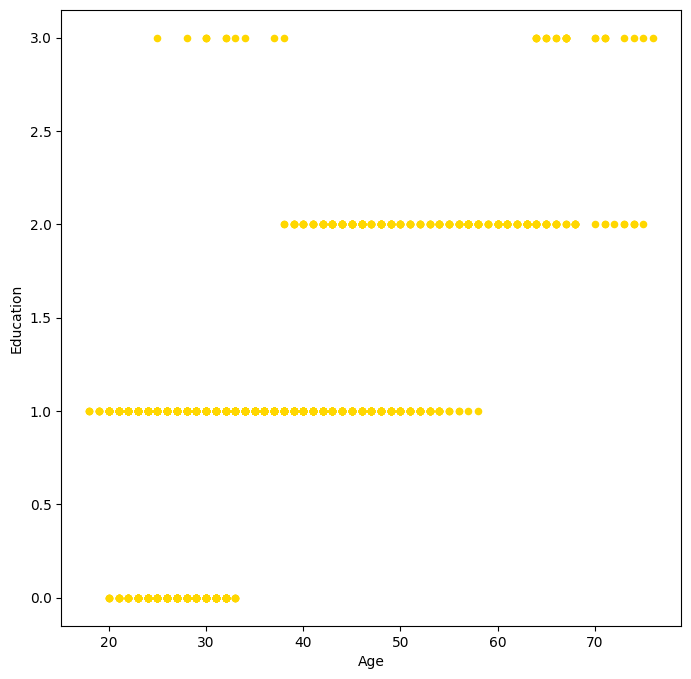

In [112]:
# Age vs income
ax1 = df.plot.scatter(x='Age',
                      y='Education',
                      c='gold', figsize = (8,8))
plt.xlabel('Age') 
plt.ylabel('Education')
plt.show()

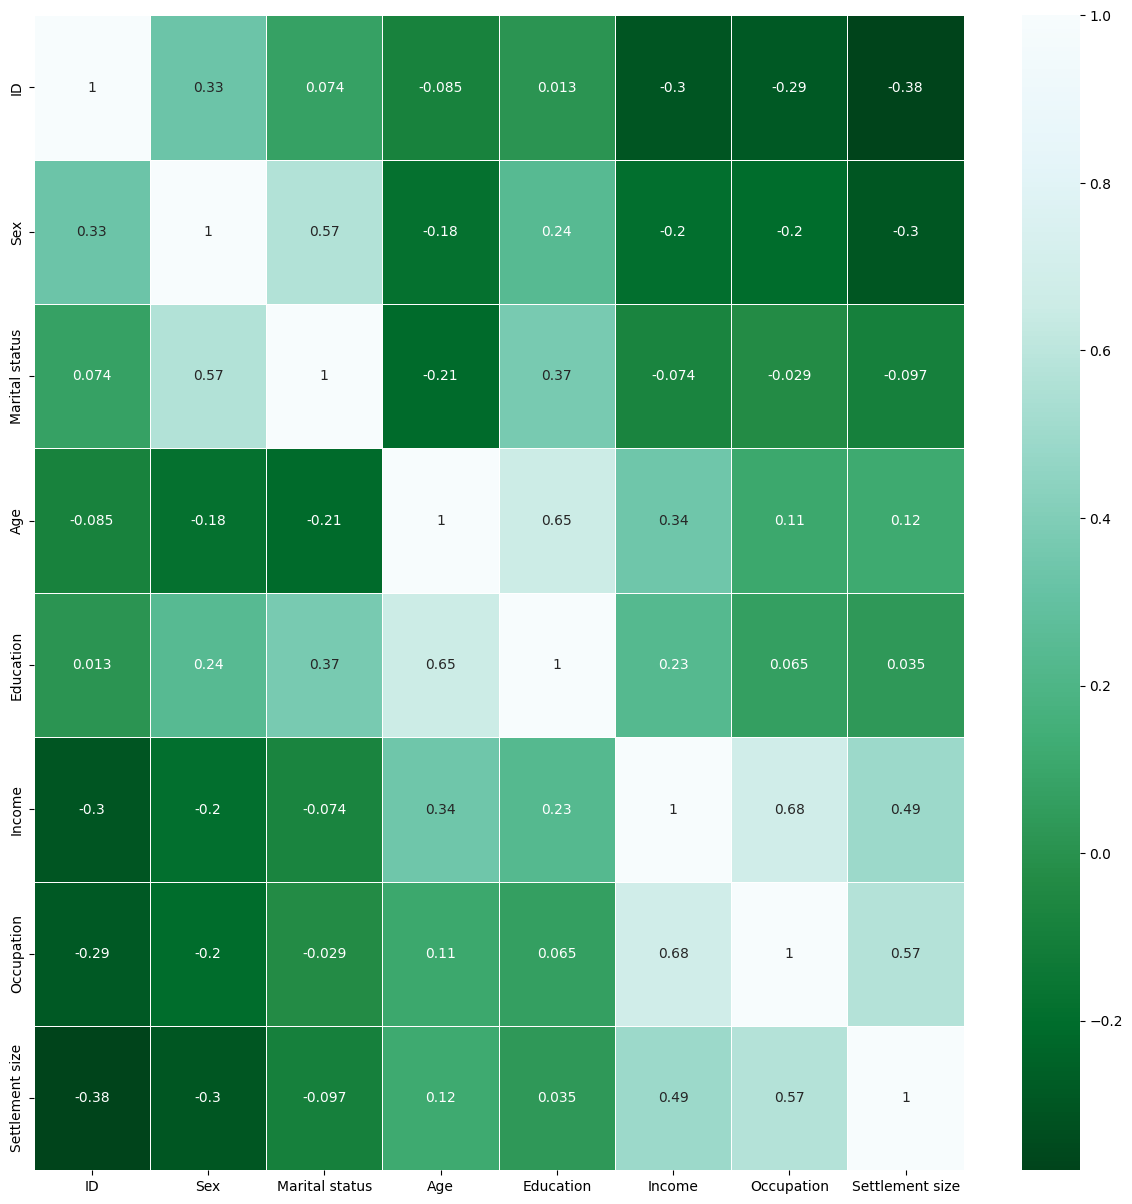

In [113]:
# EDA - Multivariant analysis to understand the data
# it shows the statistical relationship between all the variables
a = df.corr()
plt.rcParams['figure.figsize']=(15,15)
ax = sns.heatmap(a, linewidth=0.5, cmap= 'BuGn_r', annot = True)
plt.show()

In [114]:
# scaling data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.500000,0.457000,0.496500,0.308776,0.346000,0.311197,0.405250,0.369500
std,0.288892,0.498272,0.500113,0.202059,0.199927,0.139321,0.319294,0.406266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.155172,0.333333,0.226048,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.258621,0.333333,0.291434,0.500000,0.500000
75%,0.750000,1.000000,1.000000,0.413793,0.333333,0.373778,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
data_scaled[0]

array([0.        , 0.        , 0.        , 0.84482759, 0.66666667,
       0.32478101, 0.5       , 1.        ])

In [116]:
from sklearn.cluster import KMeans
# K-Means Clustering
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)



KMeans(n_clusters=2)

In [118]:
# after scaling, the inertia is 1218.6
kmeans.inertia_

1218.602967369794

Text(0, 0.5, 'Inertia')

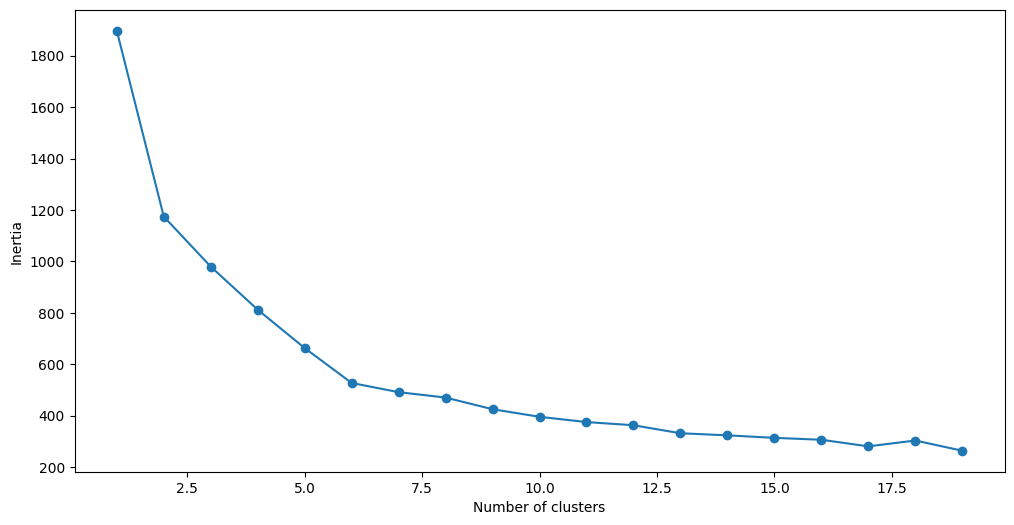

In [126]:
# Using elbow
import warnings
warnings.filterwarnings("ignore")
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    # kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
# Here on the loop shown below, i notice that the elboe happens around 5 and 6 clusters. i will use silhouette scores to have a better insight on number of clusters to use
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [120]:
# Silhouette method to assess the quality
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_scaled, labels, metric = 'euclidean'))


sil

[0.3607728451743172,
 0.3146895289713897,
 0.31829570162980597,
 0.3418649604584051,
 0.2825779296584674,
 0.3592024511576246,
 0.31636302886053835,
 0.30643972688090254,
 0.328012981286968]

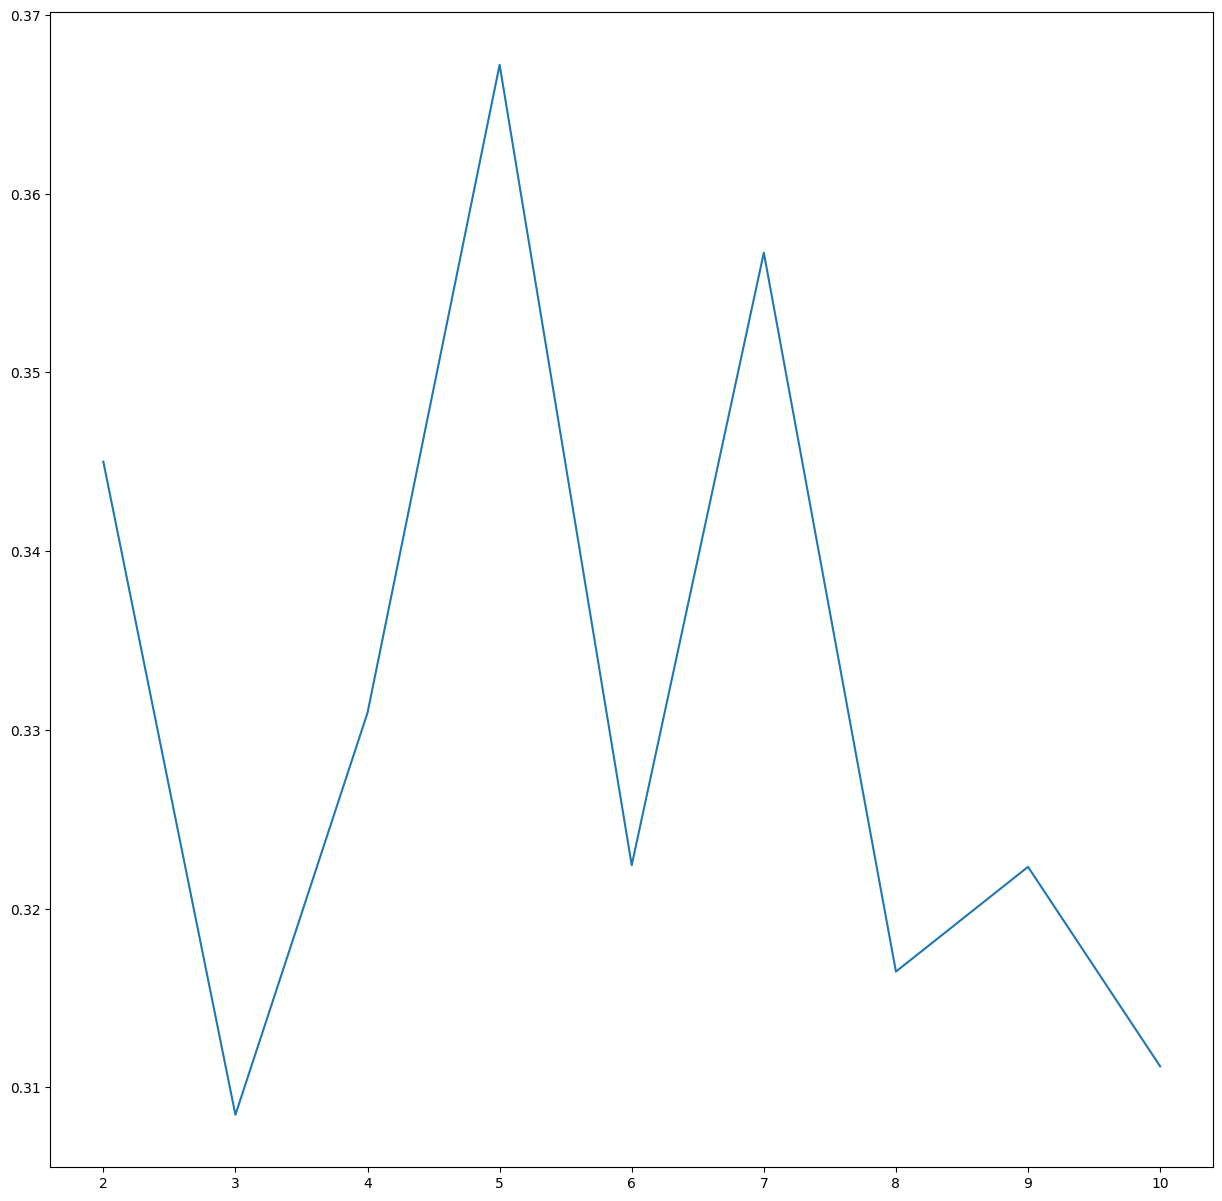

In [90]:
# from below, we see a clusters in 3, 6, 8 and 10 on x axis 
y1 = np.linspace(2, 10, 9)
plt.plot(y1, sil)

In [91]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
2    1007
1     736
0     257
Name: count, dtype: int64

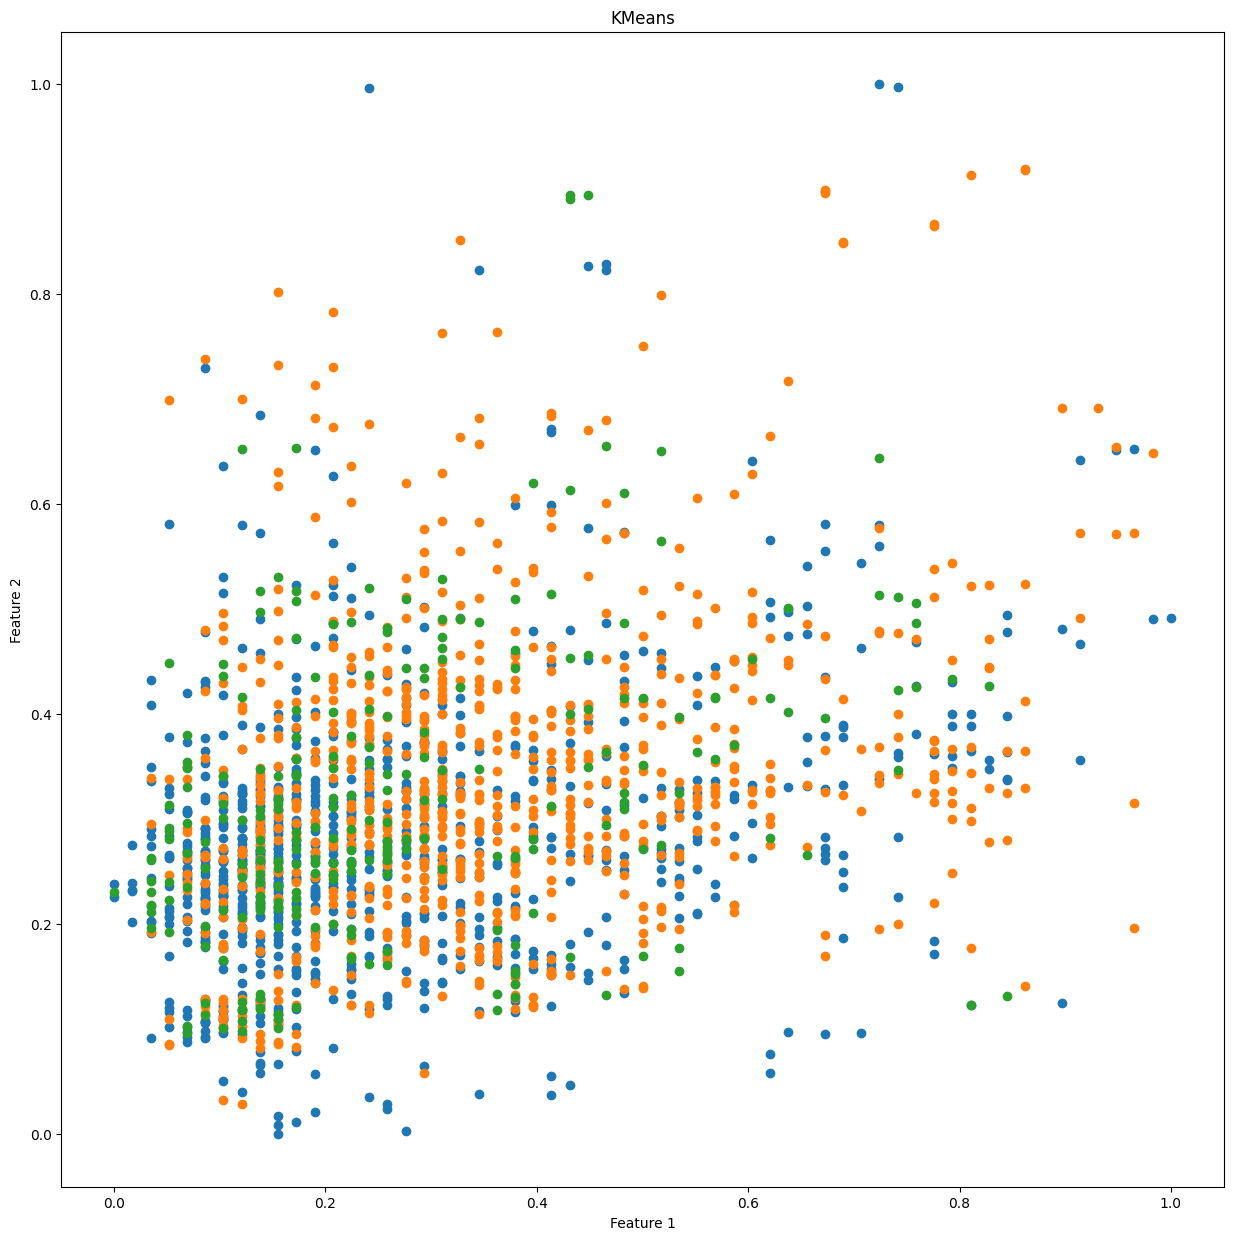

In [128]:
# Visualisation of clusters(K means)
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


# define dataset
X = data_scaled
# define the model
model = KMeans(n_clusters=3)  #i use clusters as 3 instead of 2
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 3], X[row_ix, 5])
# show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans")
pyplot.show()

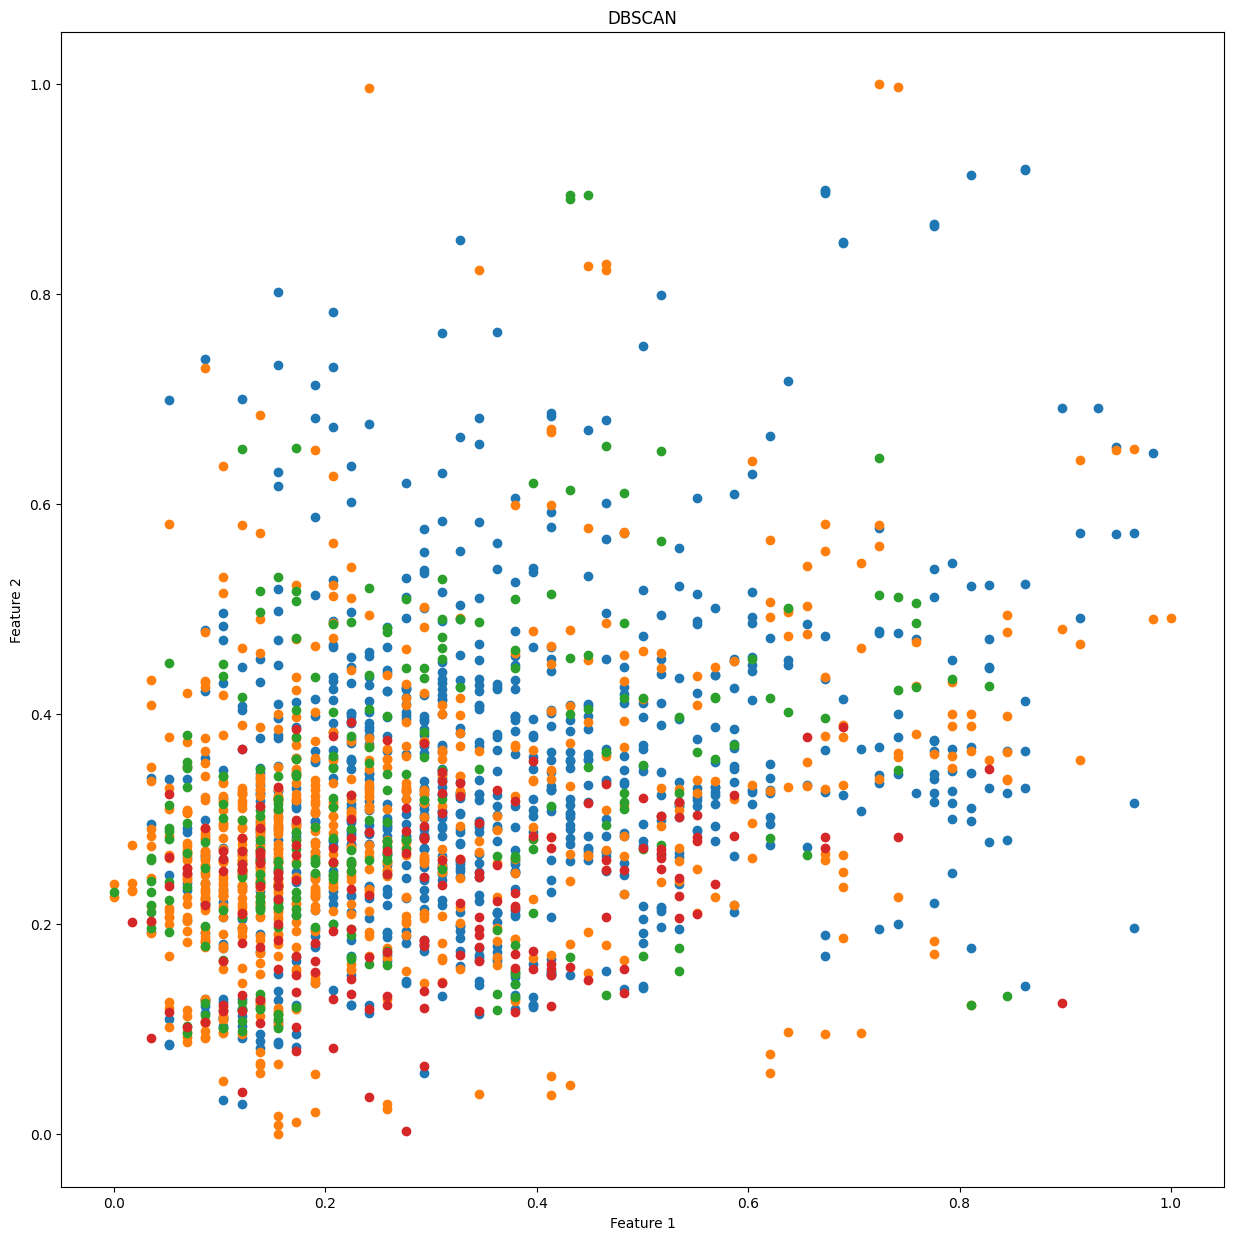

In [122]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS,cluster_optics_dbscan
from matplotlib import pyplot

# define dataset

X = data_scaled
# define the model

model = DBSCAN(eps=0.8, min_samples=10, metric='euclidean')

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 3], X[row_ix, 5])
# show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN")
pyplot.show()




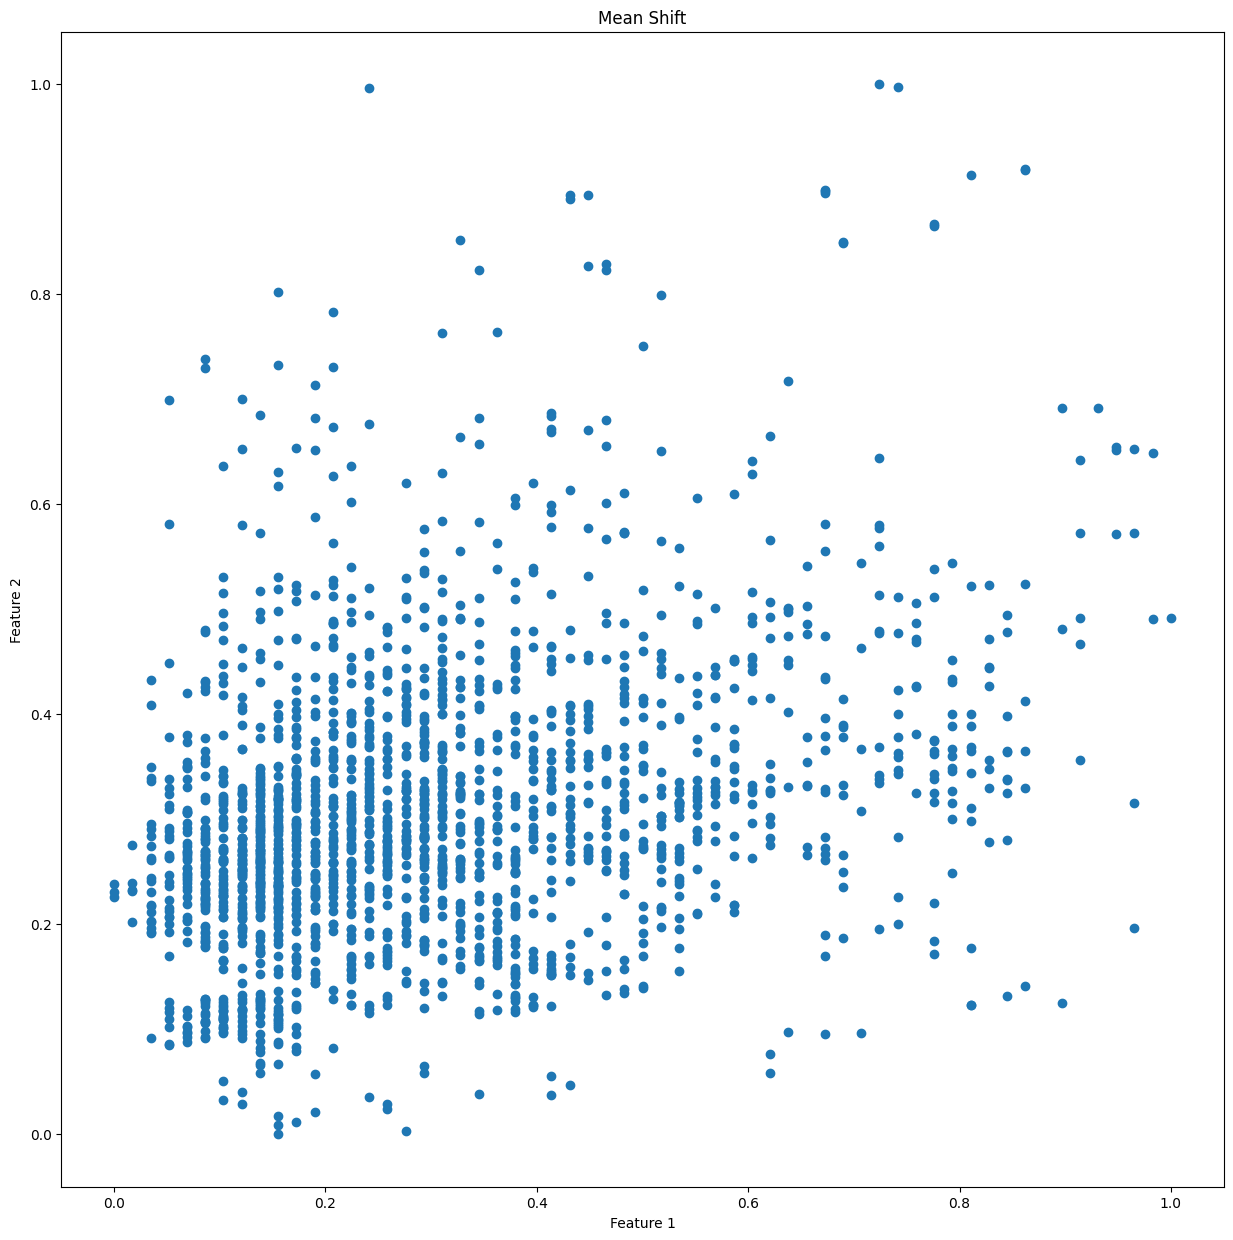

In [123]:
# # Mean Shift Clustering

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot

# define dataset
X = data_scaled
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 3], X[row_ix, 5])
# show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Mean Shift")
pyplot.show()

In [183]:
# Dimensional Reduction
# PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets


# Initialize PCA with number of components
pca = PCA(n_components=3)

# Fit_transform PCA model to data
principalComponents = pca.fit_transform(data)

PCAdf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2','principal component 3'])

datapoints = PCAdf.values
X_reduced = datapoints
m, f = datapoints.shape
k = 3

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the first few rows of transformed data
print("First few rows of transformed data:")
print(X_reduced[:5])


Explained variance ratio: [0.45077153 0.23900528 0.10531903]
First few rows of transformed data:
[[ 0.90821547  0.40459117 -0.09888653]
 [-0.41103093  0.85657503 -0.14745133]
 [ 0.53934522 -0.56603118  0.34352406]
 [ 0.77870261  0.04799076  0.05297678]
 [ 0.78336366  0.03825262  0.05080702]]


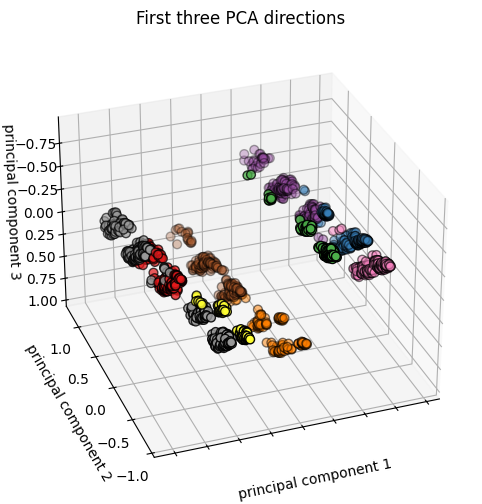

In [191]:
#Visualization

# Importing necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating 3D plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(azim=110, elev=-150, projection='3d')

# Plotting data

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
# Setting titles and labels
ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2")
ax.set_zlabel("principal component 3")

# Setting tick labels for x-axis
ax.set_xticklabels([])

# Show plot
plt.show()


In [174]:
from sklearn.cluster import KMeans
# K-Means Clustering
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on PCA data
kmeans.fit(data)



KMeans(n_clusters=2)

In [175]:
# after PCA, kmeans.inertia is 1174.29 unlike before when it wasn't under PCA, it was 1218.6 
kmeans.inertia_

1174.2949105420175

Text(0, 0.5, 'Inertia')

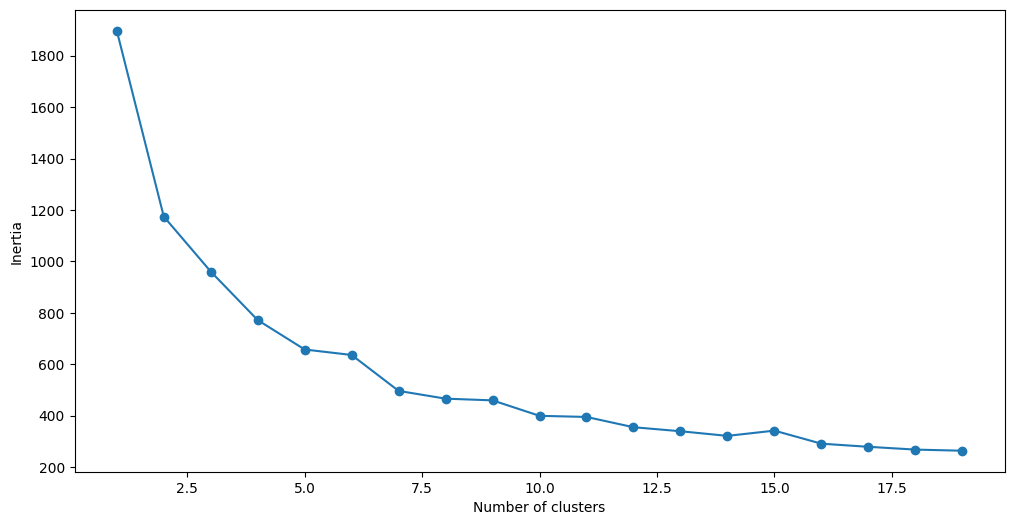

In [176]:

# Using elbow
import warnings
warnings.filterwarnings("ignore")
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    # kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
# Here on the loop shown below, i notice that the elboe happens around 2.5 and 6 clusters. i will use silhouette scores to have a better insight on number of clusters to use
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [177]:
# K-Means Clustering on reduced dimensional data
# Silhouette method
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

sil

[0.3607728451743172,
 0.31856617961357186,
 0.3231783019401877,
 0.3249989763297604,
 0.3788809928229282,
 0.3567013118877957,
 0.35011423045800627,
 0.3252355966324679,
 0.3264778703986175]

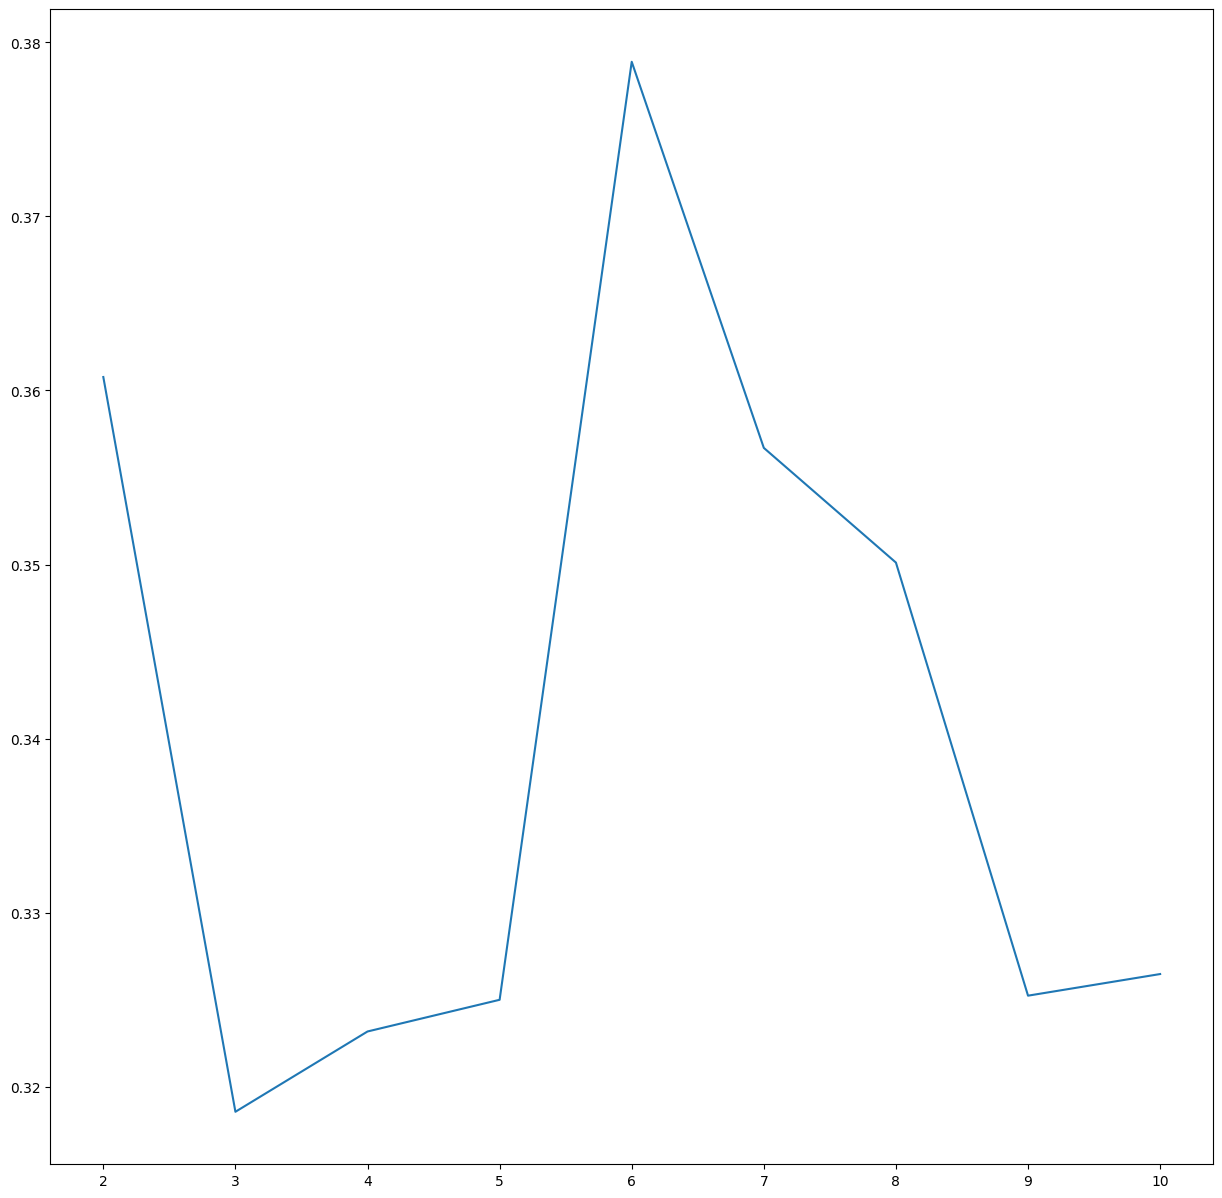

In [179]:
# after PCA, we can see clusters in 3, 5, 7 and 9 on x axis 
y1 = np.linspace(2, 10, 9)
plt.plot(y1, sil)

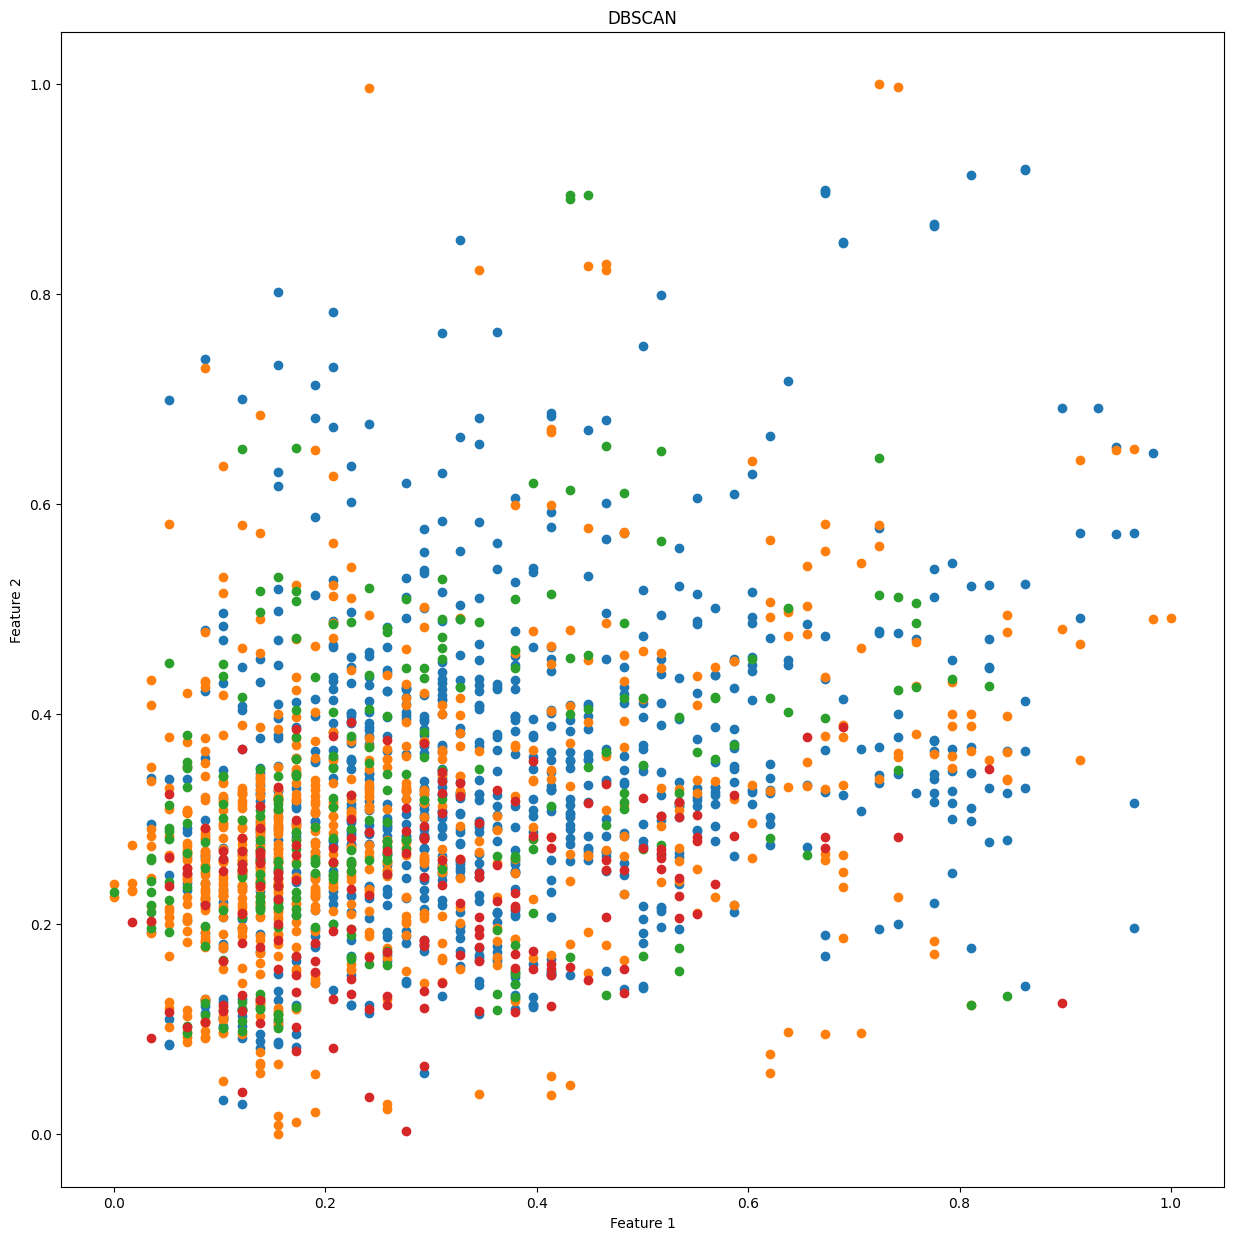

In [180]:
# DBSCAN on reduced dimensional data
# it is poerful and faster than mean shift, it shows different colors of the clusters compared to the rest.
# DBSCAN clustering
from sklearn.cluster import DBSCAN
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS,cluster_optics_dbscan
from matplotlib import pyplot

# define dataset
X = data
# define the model

model = DBSCAN(eps=0.8, min_samples=10, metric='euclidean')

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 3], X[row_ix, 5])
# show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN")
pyplot.show()

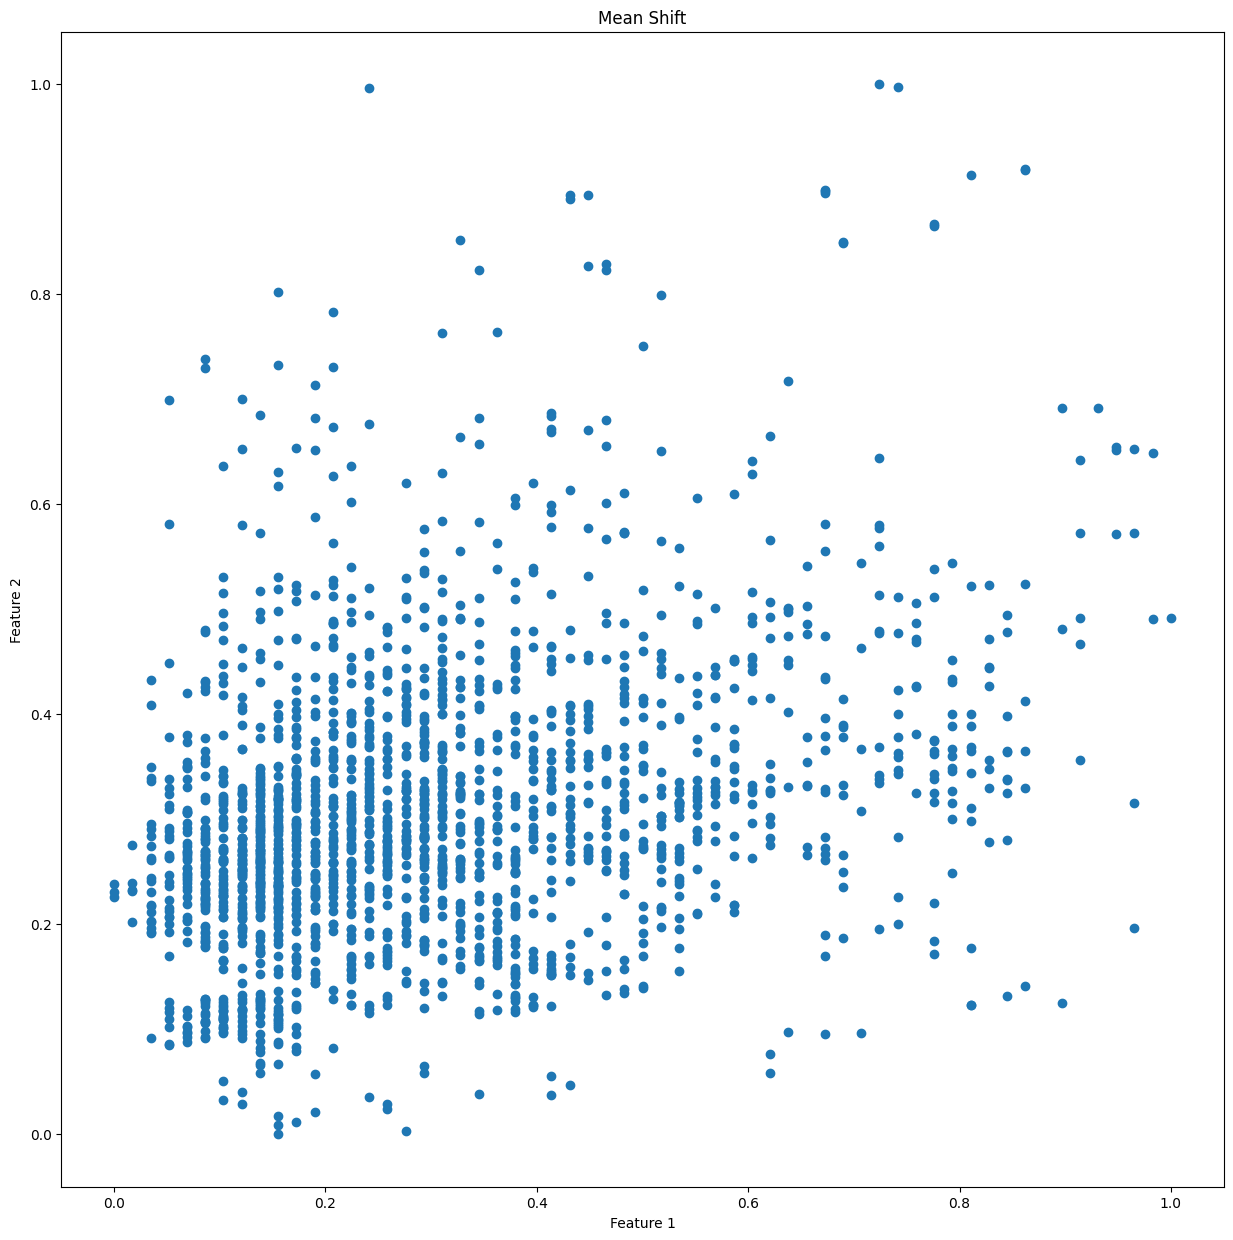

In [181]:
# Mean Shift Clustering on reduced dimensional data
# i noticed it takes time to run the code and it shows all clusters in one color
# # Mean Shift Clustering

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot

# define dataset

X = data
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 3], X[row_ix, 5])
# show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Mean Shift")
pyplot.show()